<a href="https://colab.research.google.com/github/nicolerivera1/Statistical_Learning/blob/main/Tarea2_Nicole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2: Repaso regresion lineal 

Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por

```
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
```

De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante.

In [ ]:
#--- importamos las librerías ---#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline

## Solución 

Primero se entrenan 1000 instancias de regresión lineal definidos con los datos dados, luego se obtienen los promedios y la desviación estandar. 

In [ ]:
#--- definimos función de entrenamiento ---#
def linear_regression_train(x,y):
  linear_regression = LinearRegression()
  model = linear_regression.fit(x,y)
  return model

In [ ]:
#--- inicializamos las listas de los parámetros de la regresión lineal ---#
coefs = []
intercepts = []

#--- entrenamos 1000 instancias ---#
for _ in range(0, 1000):
  #creamos los datos
  x_ = 2 * np.random.rand(100,1)
  y_ = 4 + 3 * x_ + np.random.rand(100,1)
  #entrenamos el modelo
  modelo = linear_regression_train(x_, y_)
  #guardamos los parametros estimados por el modelo
  coefs.append(modelo.coef_[0][0])
  intercepts.append(modelo.intercept_[0])

In [ ]:
#--- obtenemos la media y la desviación estandar de los parametros---#
coefs_mean = np.mean(coefs)
coefs_std = np.std(coefs)

intercepts_mean = np.mean(intercepts)
intercepts_std = np.std(intercepts)

print('coeficientes -> media: ', coefs_mean, ' std: ', coefs_std)
print('interceptos -> media: ', intercepts_mean, ' std:', intercepts_std)

coeficiente -> media:  2.998237899741752  std:  0.05116305936273897
intercepto -> media:  4.501755103627931  std: 0.059152438459844275


Teniendo esta información generamos los diagramas de barras y de cajas para cada parámetro. 

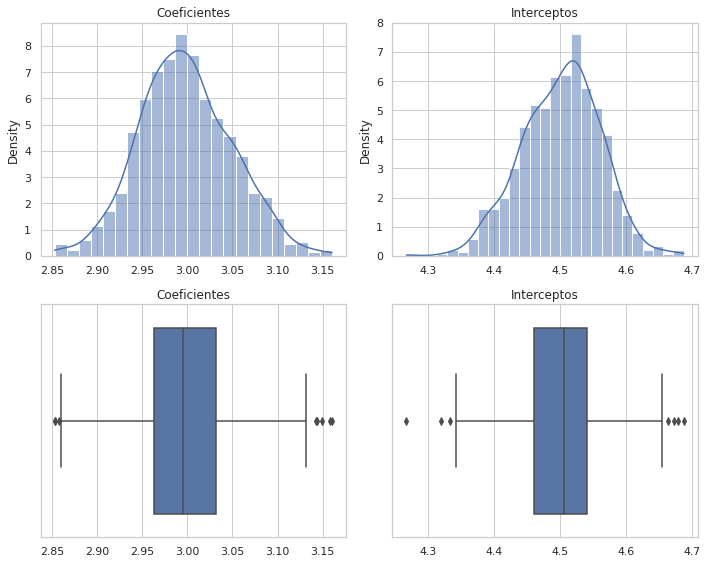

In [ ]:
#--- creamos las gráficas ---#
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

sns.set_theme(style="whitegrid") #fijamos el estilo

#graficamos 
sns.histplot(ax=ax1, x=coefs, stat='density', kde=True)
ax1.set_title('Coeficientes')

sns.histplot(ax=ax2, x=intercepts, stat='density', kde=True)
ax2.set_title('Interceptos')

sns.boxplot(x=coefs, ax=ax3)
ax3.set_title('Coeficientes')

sns.boxplot(x=intercepts, ax=ax4)
ax4.set_title('Interceptos')

plt.tight_layout()
plt.show()

A partir de las gráficas y la información del curso se puede decir que: 

- Los parametros estimados se aproximan a los teóricos con diferentes exactitudes pero la misma precisión en las dos primeras cifras decimales. Es decir, el estimado del coeficiente (pendiente) es más exacto que el estimado del intercepto, pero, las desviaciones estandar para cada distribución es similar en las dos primeras cifras decimales (ambas $0.05$).

- La media del intercepto se aleja en aproximadamente $0.5$ del valor teórico esperado. Esto podría analizarse desde la perspectiva de los generadores de números aleatorios de numpy. la función `np.random.rand` sigue una distribución uniforme entre 0 y 1, mientras que la distribución de los estimados del modelo sigue una distribución normal. 